First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

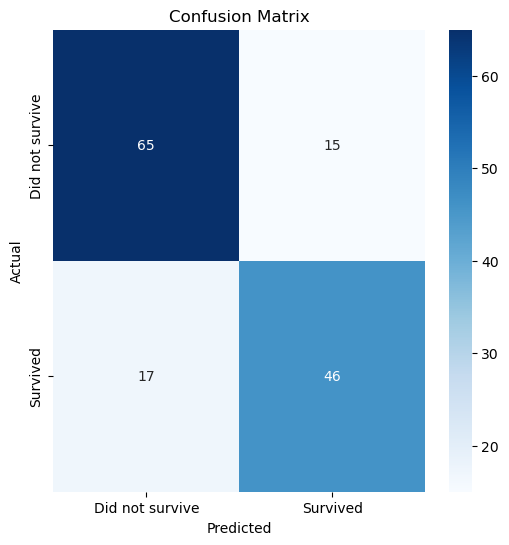

In [6]:
# 1. Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Loading and Exploring the Data
# Load Titanic dataset from a URL or local file
data = pd.read_csv('C:\\Users\\sanjh\\Downloads\\Titanic-Dataset.csv')

# Check the first few rows
print("First few rows of the dataset:")
print(data.head())

# Dataset shape and info
print("\nDataset shape:", data.shape)
print("\nData Information:")
data.info()

# 3. Data Preprocessing

# Handle missing values (drop rows with missing 'Age' and 'Embarked', and fill 'Fare' with median)
data.dropna(subset=['Age', 'Embarked'], inplace=True)
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# 3.1 Convert 'Sex' to numeric using Label Encoding
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

# 3.2 Drop irrelevant columns: 'Name', 'Ticket', 'Cabin' (optional)
data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

# 3.3 Create 'Family Size' as a new feature (SibSp + Parch)
data['Family Size'] = data['SibSp'] + data['Parch'] + 1

# 3.4 Convert categorical variable 'Embarked' into numeric using Label Encoding
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

# 3.5 Standardize numerical features (e.g., Age, Fare)
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

# 4. Splitting the Dataset into Features (X) and Target (y)
X = data[['Pclass', 'Sex', 'Age', 'Fare', 'Family Size', 'Embarked']]
y = data['Survived']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model Training (Random Forest Classifier)
# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Model Evaluation
# Predictions on test set
y_pred = model.predict(X_test)

# Evaluate the model using Accuracy, Confusion Matrix, and Classification Report
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 7. Final Model Evaluation and Insights
# Visualizing the Confusion Matrix using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Did not survive', 'Survived'], yticklabels=['Did not survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
